In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from matplotlib import pyplot as plt

from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from rfpimp import permutation_importances


/home/ramesh/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# NSL-KDD datasets
df = pd.read_csv('NSL-KDD/KDDTrain+.txt', sep=',')
df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels', 'difficulty']

protocols = df.protocol_type.value_counts()
protocols_map = {}
for i, (prop, count) in enumerate(protocols.items()):
    protocols_map[prop] = i
df.protocol_type = df.protocol_type.map(protocols_map)

services = df.service.value_counts()
service_map = {}
for i, (ser, count) in enumerate(services.items()):
    service_map[ser] = i
df.service = df.service.map(service_map)

flag_map = {}
flags = df.flag.value_counts()
for i, (flag, count) in enumerate(flags.items()):
    flag_map[flag] = i
df.flag = df.flag.map(flag_map)

df['targets'] = df.labels.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

df['targets'] = df.targets.astype(int)

In [3]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,difficulty,targets
0,0,1,6,0,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
1,0,0,1,1,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
2,0,0,0,0,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
3,0,0,0,0,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
4,0,0,1,2,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,1,1,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1
125968,8,1,1,0,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,0
125969,0,0,3,0,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,0
125970,0,0,40,1,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1


In [4]:
X = df.drop(['labels', 'difficulty', 'targets'], axis=1)
y = df['targets']

In [6]:
feature_name = dict()
feature_imp = dict()
for i, feature in enumerate(X.columns):
    feature_name[i] = feature
    feature_imp[i] = 0
feature_name
feature_imp

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0}

In [7]:
def get_feature_importance(model, X, y, check):
    model.fit(X, y)
    if check ==0:
        importance = model.coef_
    elif check ==1:
        importance = model.coef_[0]
    else:
        importance = model.feature_importances_
#     print(type(importance))
    for i, val in enumerate(importance):
        feature_imp[i] = feature_imp[i]+ round(abs(val),5)
#     print(feature_imp)
    print('Executed Model',check)

In [8]:
model1 = LinearRegression()
model2 = LogisticRegression()
# get_feature_importance(model2, X, y, check=1)
model3 = DecisionTreeRegressor()
model4 = DecisionTreeClassifier()
model5 = RandomForestRegressor()
model6 = RandomForestClassifier()
model7 = XGBClassifier()
for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7]):
    get_feature_importance(model, X, y, check=i)

Executed Model 0


/home/ramesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Executed Model 1
Executed Model 2
Executed Model 3
Executed Model 4
Executed Model 5
Executed Model 6


In [9]:
feature_imp

{0: 0.01779000004082918,
 1: 0.45852999968826774,
 2: 0.19111999988496303,
 3: 0.11484000007003546,
 4: 1.8502100012373925,
 5: 0.16412999979704618,
 6: 1.15294,
 7: 0.23477999959468837,
 8: 0.18865000000000004,
 9: 0.1262799996507168,
 10: 0.47961999999247495,
 11: 0.39377000016033653,
 12: 0.0498100001218915,
 13: 0.8237000000098534,
 14: 0.62306,
 15: 0.007630000000859145,
 16: 0.03171000000510365,
 17: 0.19520000000106172,
 18: 0.04577000001187437,
 19: 0.0,
 20: 0.67615,
 21: 0.38204000001531097,
 22: 0.3125800000500679,
 23: 0.033329999632835394,
 24: 0.22987000016629694,
 25: 0.45968000034451484,
 26: 0.1319499999993434,
 27: 0.42654999998383225,
 28: 1.1860399920463562,
 29: 0.1683599993300438,
 30: 0.12441000000373925,
 31: 0.03136000000545755,
 32: 0.11254000009484588,
 33: 0.43416000021040446,
 34: 0.835320000373125,
 35: 0.913479999846518,
 36: 1.1551899991285801,
 37: 0.27240000028312206,
 38: 0.4657000000626594,
 39: 0.22221999990001323,
 40: 0.4136999999279529}

In [10]:
list_features_importances = []
sorted_feature_importance = sorted(feature_imp.items(), key=lambda x: x[1], reverse=True)
for fImp in sorted_feature_importance:
    print(feature_name[fImp[0]], ' : ', fImp[1])
    list_features_importances.append((feature_name[fImp[0]], fImp[1]))

src_bytes  :  1.8502100012373925
same_srv_rate  :  1.1860399920463562
dst_host_srv_diff_host_rate  :  1.1551899991285801
land  :  1.15294
dst_host_same_src_port_rate  :  0.913479999846518
dst_host_diff_srv_rate  :  0.835320000373125
root_shell  :  0.8237000000098534
is_host_login  :  0.67615
su_attempted  :  0.62306
num_failed_logins  :  0.47961999999247495
dst_host_srv_serror_rate  :  0.4657000000626594
srv_serror_rate  :  0.45968000034451484
protocol_type  :  0.45852999968826774
dst_host_same_srv_rate  :  0.43416000021040446
srv_rerror_rate  :  0.42654999998383225
dst_host_srv_rerror_rate  :  0.4136999999279529
logged_in  :  0.39377000016033653
is_guest_login  :  0.38204000001531097
count  :  0.3125800000500679
dst_host_serror_rate  :  0.27240000028312206
wrong_fragment  :  0.23477999959468837
serror_rate  :  0.22987000016629694
dst_host_rerror_rate  :  0.22221999990001323
num_shells  :  0.19520000000106172
service  :  0.19111999988496303
urgent  :  0.18865000000000004
diff_srv_rate 

In [11]:
# best 24
list_features_importances[:24]

[('src_bytes', 1.8502100012373925),
 ('same_srv_rate', 1.1860399920463562),
 ('dst_host_srv_diff_host_rate', 1.1551899991285801),
 ('land', 1.15294),
 ('dst_host_same_src_port_rate', 0.913479999846518),
 ('dst_host_diff_srv_rate', 0.835320000373125),
 ('root_shell', 0.8237000000098534),
 ('is_host_login', 0.67615),
 ('su_attempted', 0.62306),
 ('num_failed_logins', 0.47961999999247495),
 ('dst_host_srv_serror_rate', 0.4657000000626594),
 ('srv_serror_rate', 0.45968000034451484),
 ('protocol_type', 0.45852999968826774),
 ('dst_host_same_srv_rate', 0.43416000021040446),
 ('srv_rerror_rate', 0.42654999998383225),
 ('dst_host_srv_rerror_rate', 0.4136999999279529),
 ('logged_in', 0.39377000016033653),
 ('is_guest_login', 0.38204000001531097),
 ('count', 0.3125800000500679),
 ('dst_host_serror_rate', 0.27240000028312206),
 ('wrong_fragment', 0.23477999959468837),
 ('serror_rate', 0.22987000016629694),
 ('dst_host_rerror_rate', 0.22221999990001323),
 ('num_shells', 0.19520000000106172)]

In [43]:
# worst 16
list_features_importances[25:]

[('urgent', 0.18865000000000004),
 ('diff_srv_rate', 0.1683599993300438),
 ('dst_bytes', 0.16412999979704618),
 ('rerror_rate', 0.1319499999993434),
 ('hot', 0.1262799996507168),
 ('srv_diff_host_rate', 0.12441000000373925),
 ('flag', 0.11484000007003546),
 ('dst_host_srv_count', 0.11254000009484588),
 ('num_compromised', 0.0498100001218915),
 ('num_access_files', 0.04577000001187437),
 ('srv_count', 0.033329999632835394),
 ('num_file_creations', 0.03171000000510365),
 ('dst_host_count', 0.03136000000545755),
 ('duration', 0.01779000004082918),
 ('num_root', 0.007630000000859145),
 ('num_outbound_cmds', 0.0)]

In [29]:
top_features_by_single = [feature[0] for feature in list_features_importances]
top_features_by_single

['src_bytes',
 'same_srv_rate',
 'dst_host_srv_diff_host_rate',
 'land',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'root_shell',
 'is_host_login',
 'su_attempted',
 'num_failed_logins',
 'dst_host_srv_serror_rate',
 'srv_serror_rate',
 'protocol_type',
 'dst_host_same_srv_rate',
 'srv_rerror_rate',
 'dst_host_srv_rerror_rate',
 'logged_in',
 'is_guest_login',
 'count',
 'dst_host_serror_rate',
 'wrong_fragment',
 'serror_rate',
 'dst_host_rerror_rate',
 'num_shells',
 'service',
 'urgent',
 'diff_srv_rate',
 'dst_bytes',
 'rerror_rate',
 'hot',
 'srv_diff_host_rate',
 'flag',
 'dst_host_srv_count',
 'num_compromised',
 'num_access_files',
 'srv_count',
 'num_file_creations',
 'dst_host_count',
 'duration',
 'num_root',
 'num_outbound_cmds']

In [13]:
import matplotlib.pyplot as plt

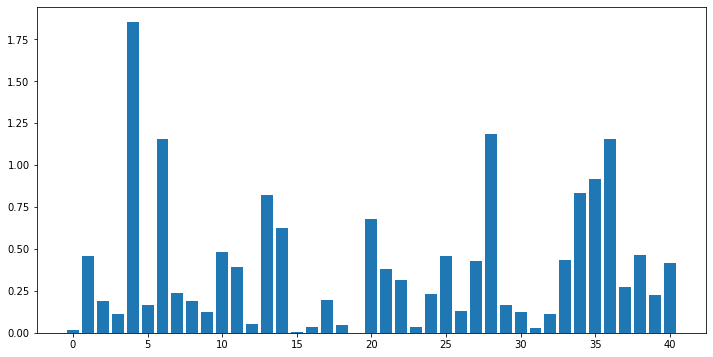

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(list(feature_imp.keys()), list(feature_imp.values()))
plt.show()
# list(feature_imp.values())

# Premutation techniques

In [17]:
pre_fea_imp = {}
for i in range(41):
    pre_fea_imp[i] = 0

In [18]:
def get_prem_fea_imp(model, X, y):
    model.fit(X, y)
    results = permutation_importance(model, X, y, scoring='accuracy')
    importance = results.importances_mean
    for i,v in enumerate(importance):
        pre_fea_imp[i] = pre_fea_imp[i]+round(v, 5)
    print('Process finished')

In [19]:
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
for model in [model1, model2]:
    get_prem_fea_imp(model, X, y)

Process finished
Process finished


In [20]:
pre_fea_imp

{0: 0.02683,
 1: 0.04537,
 2: 0.03332,
 3: 0.00667,
 4: 0.37452,
 5: 0.1819,
 6: 7e-05,
 7: 0.005399999999999999,
 8: 5e-05,
 9: 0.005900000000000001,
 10: 0.00049,
 11: 0.021920000000000002,
 12: 0.0008500000000000001,
 13: 0.00019,
 14: 2e-05,
 15: 9e-05,
 16: 0.00018,
 17: 4e-05,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 7.000000000000001e-05,
 22: 0.044379999999999996,
 23: 0.00393,
 24: 0.0023,
 25: 3e-05,
 26: 0.01112,
 27: 0.04748,
 28: 0.02791,
 29: 0.018170000000000002,
 30: 6e-05,
 31: 0.00754,
 32: 0.04231,
 33: 0.19186,
 34: 0.01454,
 35: 0.03272,
 36: 0.0023399999999999996,
 37: 0.013510000000000001,
 38: 0.0014,
 39: 0.005849999999999999,
 40: 3.0000000000000004e-05}

In [21]:
prem_list_features_importances = []
sorted_feature_importance = sorted(pre_fea_imp.items(), key=lambda x: x[1], reverse=True)
for fImp in sorted_feature_importance:
    print(feature_name[fImp[0]], ' : ', fImp[1])
    prem_list_features_importances.append((feature_name[fImp[0]], fImp[1]))

src_bytes  :  0.37452
dst_host_same_srv_rate  :  0.19186
dst_bytes  :  0.1819
srv_rerror_rate  :  0.04748
protocol_type  :  0.04537
count  :  0.044379999999999996
dst_host_srv_count  :  0.04231
service  :  0.03332
dst_host_same_src_port_rate  :  0.03272
same_srv_rate  :  0.02791
duration  :  0.02683
logged_in  :  0.021920000000000002
diff_srv_rate  :  0.018170000000000002
dst_host_diff_srv_rate  :  0.01454
dst_host_serror_rate  :  0.013510000000000001
rerror_rate  :  0.01112
dst_host_count  :  0.00754
flag  :  0.00667
hot  :  0.005900000000000001
dst_host_rerror_rate  :  0.005849999999999999
wrong_fragment  :  0.005399999999999999
srv_count  :  0.00393
dst_host_srv_diff_host_rate  :  0.0023399999999999996
serror_rate  :  0.0023
dst_host_srv_serror_rate  :  0.0014
num_compromised  :  0.0008500000000000001
num_failed_logins  :  0.00049
root_shell  :  0.00019
num_file_creations  :  0.00018
num_root  :  9e-05
is_guest_login  :  7.000000000000001e-05
land  :  7e-05
srv_diff_host_rate  :  6e

In [23]:
for ll in list_features_importances[:25]:
    print(ll)

('src_bytes', 1.8502100012373925)
('same_srv_rate', 1.1860399920463562)
('dst_host_srv_diff_host_rate', 1.1551899991285801)
('land', 1.15294)
('dst_host_same_src_port_rate', 0.913479999846518)
('dst_host_diff_srv_rate', 0.835320000373125)
('root_shell', 0.8237000000098534)
('is_host_login', 0.67615)
('su_attempted', 0.62306)
('num_failed_logins', 0.47961999999247495)
('dst_host_srv_serror_rate', 0.4657000000626594)
('srv_serror_rate', 0.45968000034451484)
('protocol_type', 0.45852999968826774)
('dst_host_same_srv_rate', 0.43416000021040446)
('srv_rerror_rate', 0.42654999998383225)
('dst_host_srv_rerror_rate', 0.4136999999279529)
('logged_in', 0.39377000016033653)
('is_guest_login', 0.38204000001531097)
('count', 0.3125800000500679)
('dst_host_serror_rate', 0.27240000028312206)
('wrong_fragment', 0.23477999959468837)
('serror_rate', 0.22987000016629694)
('dst_host_rerror_rate', 0.22221999990001323)
('num_shells', 0.19520000000106172)
('service', 0.19111999988496303)


In [30]:
top_features_by_prem = []
for ll in prem_list_features_importances:
#     print(ll)
    top_features_by_prem.append(ll[0])
top_features_by_prem

['src_bytes',
 'dst_host_same_srv_rate',
 'dst_bytes',
 'srv_rerror_rate',
 'protocol_type',
 'count',
 'dst_host_srv_count',
 'service',
 'dst_host_same_src_port_rate',
 'same_srv_rate',
 'duration',
 'logged_in',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'rerror_rate',
 'dst_host_count',
 'flag',
 'hot',
 'dst_host_rerror_rate',
 'wrong_fragment',
 'srv_count',
 'dst_host_srv_diff_host_rate',
 'serror_rate',
 'dst_host_srv_serror_rate',
 'num_compromised',
 'num_failed_logins',
 'root_shell',
 'num_file_creations',
 'num_root',
 'is_guest_login',
 'land',
 'srv_diff_host_rate',
 'urgent',
 'num_shells',
 'dst_host_srv_rerror_rate',
 'srv_serror_rate',
 'su_attempted',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login']

# Top 24 features by single feature imp

In [31]:
top_features_by_single[:24]

['src_bytes',
 'same_srv_rate',
 'dst_host_srv_diff_host_rate',
 'land',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'root_shell',
 'is_host_login',
 'su_attempted',
 'num_failed_logins',
 'dst_host_srv_serror_rate',
 'srv_serror_rate',
 'protocol_type',
 'dst_host_same_srv_rate',
 'srv_rerror_rate',
 'dst_host_srv_rerror_rate',
 'logged_in',
 'is_guest_login',
 'count',
 'dst_host_serror_rate',
 'wrong_fragment',
 'serror_rate',
 'dst_host_rerror_rate',
 'num_shells']

# Top 24 features by premutation

In [32]:
top_features_by_prem[:24]

['src_bytes',
 'dst_host_same_srv_rate',
 'dst_bytes',
 'srv_rerror_rate',
 'protocol_type',
 'count',
 'dst_host_srv_count',
 'service',
 'dst_host_same_src_port_rate',
 'same_srv_rate',
 'duration',
 'logged_in',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'rerror_rate',
 'dst_host_count',
 'flag',
 'hot',
 'dst_host_rerror_rate',
 'wrong_fragment',
 'srv_count',
 'dst_host_srv_diff_host_rate',
 'serror_rate']

# Common between single feature method and premutation 

In [33]:
common_bet_24_features = set(top_features_by_single[:24]).intersection(set(top_features_by_prem[:24]))
common_bet_24_features, len(common_bet_24_features)

({'count',
  'dst_host_diff_srv_rate',
  'dst_host_rerror_rate',
  'dst_host_same_src_port_rate',
  'dst_host_same_srv_rate',
  'dst_host_serror_rate',
  'dst_host_srv_diff_host_rate',
  'logged_in',
  'protocol_type',
  'same_srv_rate',
  'serror_rate',
  'src_bytes',
  'srv_rerror_rate',
  'wrong_fragment'},
 14)

# Recursive Feature Elimination

In [116]:
model = LogisticRegression() 
rfe = RFE(model, 24)
fit = rfe.fit(X, y)
fit.support_
# print()
# fit.ranking_

/home/ramesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ramesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/ramesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ramesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False])

In [120]:
X.columns[fit.support_]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'num_compromised', 'num_root', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate'],
      dtype='object')

In [121]:
model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1) 
rfe = RFE(model, 24)
fit = rfe.fit(X, y)
X.columns[fit.support_]

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'logged_in', 'num_compromised', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [126]:
common = set(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'logged_in', 'num_compromised', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']).intersection(set(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'num_compromised', 'num_root', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate']))

In [130]:
common

{'count',
 'dst_bytes',
 'dst_host_count',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'flag',
 'logged_in',
 'num_compromised',
 'protocol_type',
 'same_srv_rate',
 'serror_rate',
 'service',
 'src_bytes',
 'srv_count',
 'srv_serror_rate'}

In [128]:
len(common)

19

In [129]:
model = DecisionTreeClassifier() 
rfe = RFE(model, 24)
fit = rfe.fit(X, y)
X.columns[fit.support_]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'count', 'serror_rate', 'rerror_rate',
       'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate'],
      dtype='object')

In [131]:
most_common = set(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'count', 'serror_rate', 'rerror_rate',
       'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate']).intersection(set(list(common)))

In [132]:
most_common

{'count',
 'dst_bytes',
 'dst_host_count',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate',
 'flag',
 'logged_in',
 'num_compromised',
 'protocol_type',
 'serror_rate',
 'service',
 'src_bytes'}

In [133]:
len(most_common)

16

In [135]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
for i in range(1, 42):
    sel = RFE(model, n_features_to_select=i)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_ref = sel.transform(x_test)
    print('Selected features: ', i)
    run_randomForest(X_train_rfe, X_test_ref, y_train, y_test)
    print()

In [38]:
# try it
model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1) 
rfe = RFE(model, 24)
fit = rfe.fit(X, y)
print(X.columns[fit.support_])
fit.ranking_

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'logged_in', 'num_compromised', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


array([ 6,  1,  1,  1,  1,  1, 14,  1, 15,  3,  9,  1,  1, 11, 16,  8, 10,
       12, 13, 18, 17,  7,  1,  1,  1,  1,  2,  5,  1,  1,  4,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

# Overall Results

## Top feature after removing constant, quasi constant and pearson coefficient 

In [35]:
top_features_by_CQPC = ['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate']
top_features_by_CQPC

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate']

# Top 24 feature based on single feature importance

In [36]:
top_features_by_single[:24]

['src_bytes',
 'same_srv_rate',
 'dst_host_srv_diff_host_rate',
 'land',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'root_shell',
 'is_host_login',
 'su_attempted',
 'num_failed_logins',
 'dst_host_srv_serror_rate',
 'srv_serror_rate',
 'protocol_type',
 'dst_host_same_srv_rate',
 'srv_rerror_rate',
 'dst_host_srv_rerror_rate',
 'logged_in',
 'is_guest_login',
 'count',
 'dst_host_serror_rate',
 'wrong_fragment',
 'serror_rate',
 'dst_host_rerror_rate',
 'num_shells']

# Top features by premutation technique

In [37]:
top_24_features_by_prem[:24]

['src_bytes',
 'dst_host_same_srv_rate',
 'dst_bytes',
 'srv_rerror_rate',
 'protocol_type',
 'count',
 'dst_host_srv_count',
 'service',
 'dst_host_same_src_port_rate',
 'same_srv_rate',
 'duration',
 'logged_in',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'rerror_rate',
 'dst_host_count',
 'flag',
 'hot',
 'dst_host_rerror_rate',
 'wrong_fragment',
 'srv_count',
 'dst_host_srv_diff_host_rate',
 'serror_rate']

# Top 24 features by RFE - RFC

In [40]:
top_24_by_rfe_rfc = ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'logged_in', 'num_compromised', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']
for f in top_24_by_rfe_rfc:
    print(f)

protocol_type
service
flag
src_bytes
dst_bytes
wrong_fragment
logged_in
num_compromised
count
srv_count
serror_rate
srv_serror_rate
same_srv_rate
diff_srv_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate


# Top 24 features by RFE - DTC

In [41]:
top_24_by_rfe_dtc = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'count', 'serror_rate', 'rerror_rate',
       'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate']
for f in top_24_by_rfe_dtc:
    print(f)

duration
protocol_type
service
flag
src_bytes
dst_bytes
wrong_fragment
hot
num_failed_logins
logged_in
num_compromised
count
serror_rate
rerror_rate
diff_srv_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate


# Top 24 features by RFE - LR

In [42]:
top_24_by_rfe_lr = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'num_compromised', 'num_root', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate']
for f in top_24_by_rfe_lr:
    print(f)

duration
protocol_type
service
flag
src_bytes
dst_bytes
hot
logged_in
num_compromised
num_root
count
srv_count
serror_rate
srv_serror_rate
srv_rerror_rate
same_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_same_src_port_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
